In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

turking = pd.read_csv('5.28.19 Turking Results - Sheet1.csv')

### Data Processing

In [70]:
turking.shape

(88, 20)

In [49]:
turking.dtypes

WorkerId                           object
AssignmentStatus                   object
AcceptTime                         object
SubmitTime                         object
AutoApprovalTime                   object
ApprovalTime                      float64
RejectionTime                     float64
RequesterFeedback                 float64
WorkTimeInSeconds                   int64
LifetimeApprovalRate               object
Last30DaysApprovalRate             object
Last7DaysApprovalRate              object
Input.ID                           object
Input.text                         object
Answer.Attibutional similarity      int64
Answer.Relational similarity        int64
dtype: object

In [50]:
#Kicking out the bad reviewer who gave every text a score of (2,2)

turking = turking[ turking['WorkerId'] != 'A2DPNKRTDSDF7X'   ]

In [51]:
#Creating a single column of tuples for the result scores, (attributional score, relational score)

turking['Score'] = list(zip(turking['Answer.Attibutional similarity'], turking['Answer.Relational similarity'] ))

In [52]:
#Converting to datetime format and creating a new column for time taken

turking['AcceptTime'] = pd.to_datetime(turking['AcceptTime'].astype(str))
turking['SubmitTime'] = pd.to_datetime(turking['SubmitTime'].astype(str))

turking['TimeTaken'] = turking['SubmitTime'] - turking['AcceptTime'] 

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


### Stats

In [53]:
turking['TimeTaken'].describe()

count                        88
mean     0 days 00:01:08.090909
std      0 days 00:03:16.965055
min             0 days 00:00:05
25%             0 days 00:00:09
50%             0 days 00:00:19
75%      0 days 00:00:45.250000
max             0 days 00:21:36
Name: TimeTaken, dtype: object

In [54]:
turking['Score'].value_counts()

(2, 2)    45
(2, 3)    16
(1, 2)     8
(3, 3)     6
(2, 1)     5
(1, 3)     4
(3, 2)     2
(1, 1)     1
(3, 1)     1
Name: Score, dtype: int64

In [55]:
#Creating a dictionary for Input.ID
#Creating a new column for encoded Input.ID called ID_

dict_values = turking['Input.ID'].unique()
dict_keys = [i for i in range(len(turking['Input.ID'].unique()) )]

input_ID_Dict = dict(zip(dict_keys, dict_values))
input_Assign_Dict = dict(zip(dict_values, dict_keys))

turking['Input.ID_'] = turking['Input.ID'].replace(input_Assign_Dict )


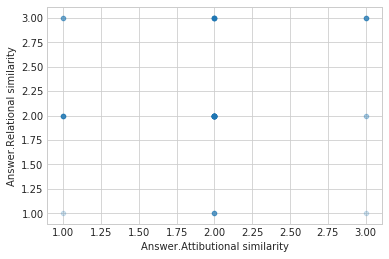

In [67]:
# All of scores plotted as a scatter plot

turking.plot( x = 'Answer.Attibutional similarity', y='Answer.Relational similarity' , kind ='scatter', alpha = '0.2')

#### Stats by input text

Text(0.5,1,'Distribution of Attributional Ratings by input ID ')

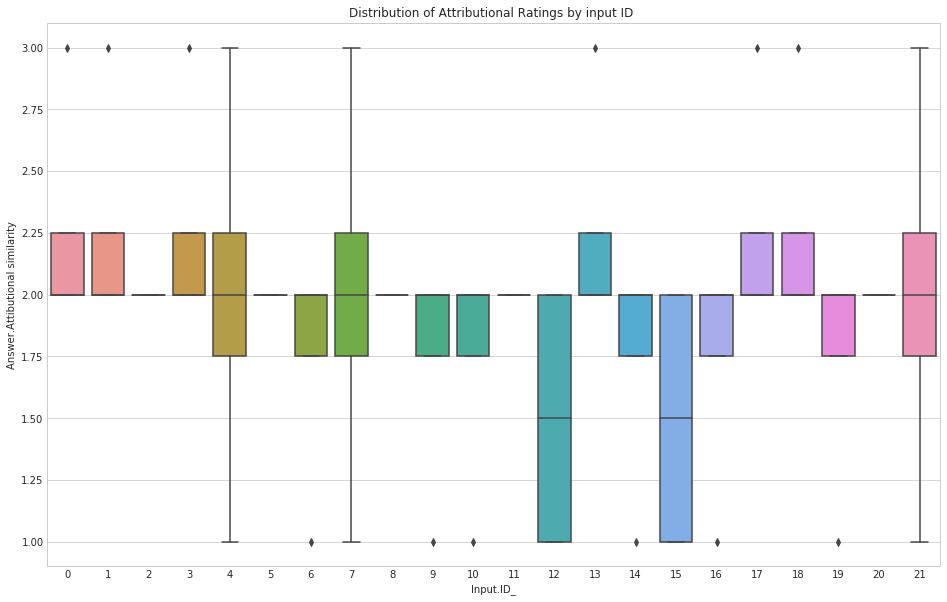

In [68]:
fig = plt.figure(figsize=(16,10)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(data=turking, x='Input.ID_', y='Answer.Attibutional similarity', ax=ax)
ax.set_title('Distribution of Attributional Ratings by input ID ')

Text(0.5,1,'Distribution of Relational Ratings by input ID ')

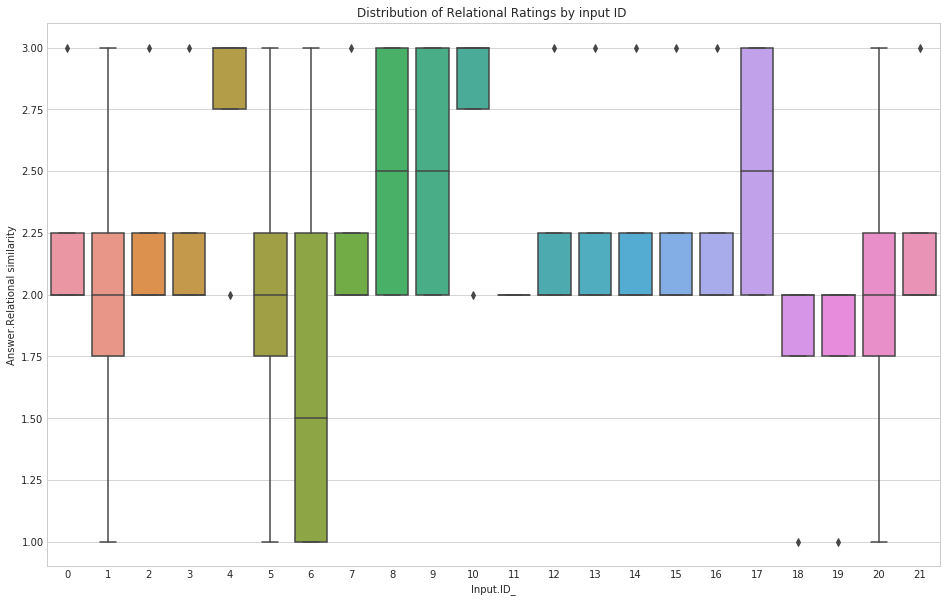

In [69]:
fig = plt.figure(figsize=(16,10)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(data=turking, x='Input.ID_', y='Answer.Relational similarity', ax=ax)
ax.set_title('Distribution of Relational Ratings by input ID ')

Text(0.5,1,'Distribution of time taken by input ID ')

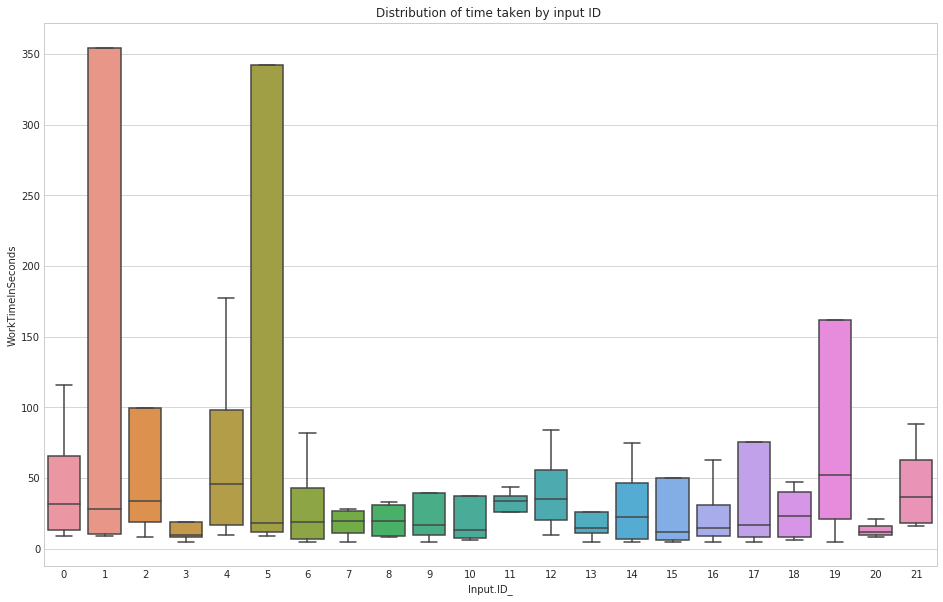

In [93]:
#Outliers have been removed
#There are 2 data points with more than 1000 seconds that mess with the graphs

fig = plt.figure(figsize=(16,10)) 
ax = fig.gca()
sns.set_style("whitegrid")
sns.boxplot(data=turking, x='Input.ID_', y='WorkTimeInSeconds', ax=ax, showfliers = False )
ax.set_title('Distribution of time taken by input ID ')

In [146]:
#unique scores and stats by input text

def review_stats_by_input(input_id):
    name =  input_ID_Dict[input_id]
    print( str(input_id) + " : " + name)
    print('unique reviews : ' + str(df[df['Input.ID_'] == input_id]['Score'].unique()) ) 
    print('Relational std : ' + str(df[df['Input.ID_'] == input_id]['Answer.Relational similarity'].std()) )
    print('Relational mean : ' + str(df[df['Input.ID_'] == input_id]['Answer.Relational similarity'].mean()) )
    print('Attributional std : ' + str(df[df['Input.ID_'] == input_id]['Answer.Attibutional similarity'].std()) )
    print('Attributional mean : ' + str(df[df['Input.ID_'] == input_id]['Answer.Attibutional similarity'].mean()) )
    print()
    

df = turking[['Input.ID_','Score','Answer.Relational similarity','Answer.Attibutional similarity']]

for input_id in df['Input.ID_'].unique():
    review_stats_by_input(input_id)
    

0 : [3707, PARA#1255, SENT#1]
unique reviews : [(2, 2) (3, 2) (2, 3)]
Relational std : 0.5
Relational mean : 2.25
Attributional std : 0.5
Attributional mean : 2.25

1 : [4345, PARA#5355, SENT#1]
unique reviews : [(2, 2) (2, 3) (3, 1)]
Relational std : 0.816496580927726
Relational mean : 2.0
Attributional std : 0.5
Attributional mean : 2.25

2 : [6616, PARA#2754, SENT#2]
unique reviews : [(2, 2) (2, 3)]
Relational std : 0.5
Relational mean : 2.25
Attributional std : 0.0
Attributional mean : 2.0

3 : [6782, PARA#1053, SENT#7]
unique reviews : [(2, 2) (3, 3)]
Relational std : 0.5
Relational mean : 2.25
Attributional std : 0.5
Attributional mean : 2.25

4 : [1712, PARA#517, SENT#5]
unique reviews : [(3, 3) (2, 3) (2, 2) (1, 3)]
Relational std : 0.5
Relational mean : 2.75
Attributional std : 0.816496580927726
Attributional mean : 2.0

5 : [2265, PARA#123, SENT#2]
unique reviews : [(2, 1) (2, 2) (2, 3)]
Relational std : 0.816496580927726
Relational mean : 2.0
Attributional std : 0.0
Attribut

In [147]:
# Sentences we have manually rated as a group, prior to turking

sentences_from_manual_preview = [0,1,3,5,6,8,10,12,13,17,19,20,21]
prerated = turking[ turking['Input.ID_'].isin(sentences_from_manual_preview) ]

         
for input_id in prerated['Input.ID_'].unique():
    review_stats_by_input(input_id)

0 : [3707, PARA#1255, SENT#1]
unique reviews : [(2, 2) (3, 2) (2, 3)]
Relational std : 0.5
Relational mean : 2.25
Attributional std : 0.5
Attributional mean : 2.25

1 : [4345, PARA#5355, SENT#1]
unique reviews : [(2, 2) (2, 3) (3, 1)]
Relational std : 0.816496580927726
Relational mean : 2.0
Attributional std : 0.5
Attributional mean : 2.25

3 : [6782, PARA#1053, SENT#7]
unique reviews : [(2, 2) (3, 3)]
Relational std : 0.5
Relational mean : 2.25
Attributional std : 0.5
Attributional mean : 2.25

5 : [2265, PARA#123, SENT#2]
unique reviews : [(2, 1) (2, 2) (2, 3)]
Relational std : 0.816496580927726
Relational mean : 2.0
Attributional std : 0.0
Attributional mean : 2.0

6 : [5686, PARA#638, SENT#3]
unique reviews : [(1, 1) (2, 3) (2, 2) (2, 1)]
Relational std : 0.9574271077563381
Relational mean : 1.75
Attributional std : 0.5
Attributional mean : 1.75

8 : [8590, PARA#51, SENT#10]
unique reviews : [(2, 2) (2, 3)]
Relational std : 0.5773502691896257
Relational mean : 2.5
Attributional std

#### Stats by reviewer

In [61]:
# The unique worker id's
turking['WorkerId'].unique()

array(['A15UR9T6I32Y2D', 'A1V34NS01O0GH6', 'A20PV3RB3I0W8S',
       'A2CN2V295GTNN9', 'A34GH8VX3QZC75', 'A39XF45WLMIGX2',
       'A3CD4KC3AQM43S', 'A3EA602N6JSZ5W', 'A3JP94W2FLW2XH',
       'AKB82TCYUECWD', 'AL5Z2NJTCH427', 'AR2S2J4DMA0N1'], dtype=object)

In [62]:
#Creating a dictionary for Input.ID
#Creating a new column for encoded Input.ID called ID_

dict_values = turking['WorkerId'].unique()
dict_keys = [i for i in range(len(turking['WorkerId'].unique()) )]

worker_ID_Dict = dict(zip(dict_keys, dict_values))
worker_Assign_Dict = dict(zip(dict_values, dict_keys))

turking['WorkerId_'] = turking['WorkerId'].replace(worker_Assign_Dict )

Text(0.5,1,'Distribution of time taken Worker ')

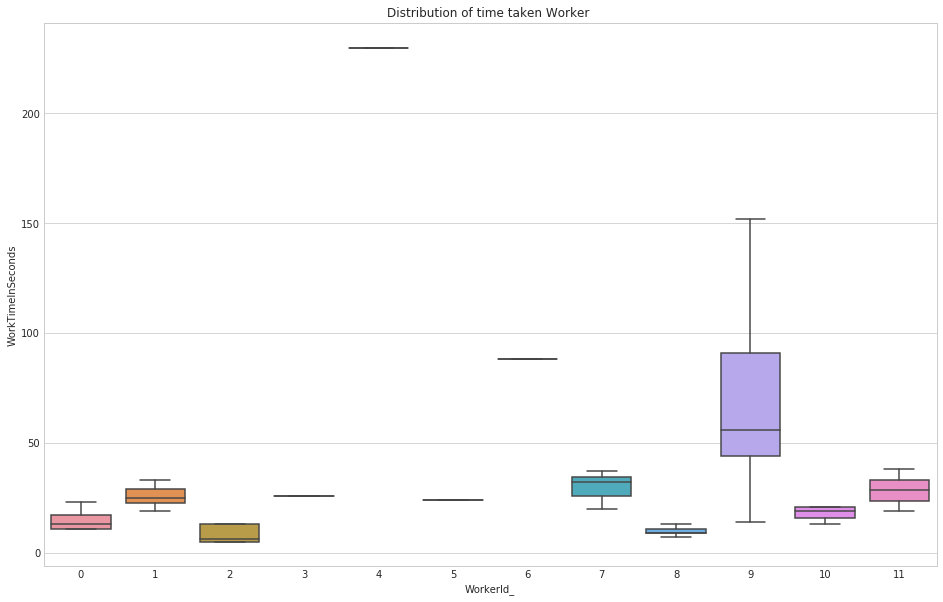

In [94]:
#Outliers have been removed

fig = plt.figure(figsize=(16,10))
ax = fig.gca() 
sns.set_style("whitegrid")
sns.boxplot(data=turking, x='WorkerId_', y='WorkTimeInSeconds', ax=ax, showfliers = False)
ax.set_title('Distribution of time taken Worker ')

In [142]:
#unique scores given by reviewers

def review_stats_by_worker(worker):
    name =  worker_ID_Dict[worker]
    print(str(worker) + ' : ' + name)
    print('unique reviews : ' + str(foo[foo['WorkerId_'] == worker]['Score'].unique()) ) 
    print('Relational std : ' + str(foo[foo['WorkerId_'] == worker]['Answer.Relational similarity'].std()) )
    print('Relational mean : ' + str(foo[foo['WorkerId_'] == worker]['Answer.Relational similarity'].mean()) )
    print('Attributional std : ' + str(foo[foo['WorkerId_'] == worker]['Answer.Attibutional similarity'].std()) )
    print('Attributional mean : ' + str(foo[foo['WorkerId_'] == worker]['Answer.Attibutional similarity'].mean()) )
    print()
    

foo = turking[['WorkerId_','Score','Answer.Relational similarity','Answer.Attibutional similarity']]

for worker in foo['WorkerId_'].unique():
    fewer = []
    if foo[ foo['WorkerId_'] == worker ]['WorkerId_'].count() >= 5:
        review_stats_by_worker(worker)
    else:
        print( 'ID ' + str(worker) + ' has fewer than 5 entries')
        print()    
    
    
    


ID 0 has fewer than 5 entries

1 : A1V34NS01O0GH6
unique reviews : [(3, 3) (2, 1) (1, 1) (2, 2)]
Relational std : 0.8944271909999159
Relational mean : 2.0
Attributional std : 0.752772652709081
Attributional mean : 2.1666666666666665

2 : A20PV3RB3I0W8S
unique reviews : [(2, 3) (2, 2) (3, 2)]
Relational std : 0.48304589153964794
Relational mean : 2.3333333333333335
Attributional std : 0.2182178902359923
Attributional mean : 2.0476190476190474

ID 3 has fewer than 5 entries

ID 4 has fewer than 5 entries

ID 5 has fewer than 5 entries

ID 6 has fewer than 5 entries

ID 7 has fewer than 5 entries

8 : A3JP94W2FLW2XH
unique reviews : [(2, 3) (2, 2) (3, 3)]
Relational std : 0.511766315719159
Relational mean : 2.5
Attributional std : 0.35125008665710444
Attributional mean : 2.1363636363636362

9 : AKB82TCYUECWD
unique reviews : [(1, 3) (2, 2) (1, 2) (2, 3) (2, 1)]
Relational std : 0.5732115042211107
Relational mean : 2.142857142857143
Attributional std : 0.50709255283711
Attributional mean :

ID 0 has fewer than 5 entries

ID 3 has fewer than 5 entries

ID 4 has fewer than 5 entries

ID 5 has fewer than 5 entries

ID 6 has fewer than 5 entries

ID 7 has fewer than 5 entries

ID 11 has fewer than 5 entries



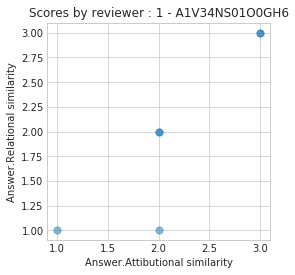

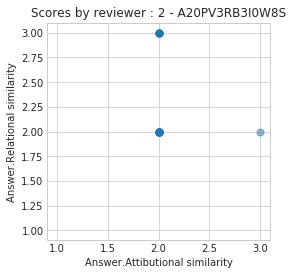

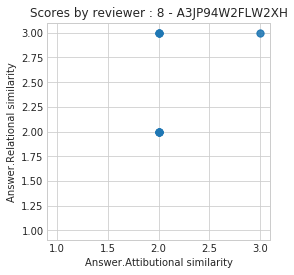

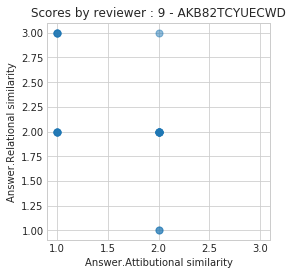

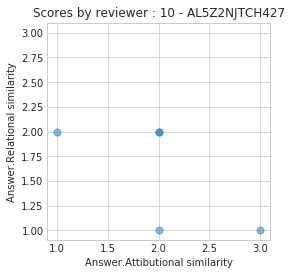

In [101]:
def plot_score( worker_id_):
    bar = turking[ turking['WorkerId_'] == worker_id_ ]  
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca() 
    bar.plot( x = 'Answer.Attibutional similarity', y='Answer.Relational similarity' , kind ='scatter',
             alpha = '0.5',s= 50, ax = ax)
    ID = worker_ID_Dict[worker_id_]
    ax.set_title('Scores by reviewer : ' + str(worker_id_) + " - " + ID)
    ax.set_ylim(0.9,3.1)
    ax.set_xlim(0.9,3.1)
    

for worker in turking['WorkerId_'].unique():
    fewer = []
    if foo[ foo['WorkerId_'] == worker ]['WorkerId_'].count() >= 5:
        plot_score(worker)
    else:
        print( 'ID ' + str(worker) + ' has fewer than 5 entries')
        print() 
    

In [121]:
myfoo = turking[ turking['WorkerId_'].isin([1,7,9,10]) ]
myfoo[['Score','Input.text']].sort_values('Input.text')


,Score,Input.text
91,"(1, 2)",""" I guess that looks like a possible murder, ""..."
59,"(2, 2)",""" I guess that looks like a possible murder, ""..."
92,"(2, 3)",""" The kitchen's like an oven, and I've nearly ..."
106,"(3, 1)",""" The kitchen's like an oven, and I've nearly ..."
90,"(2, 2)","About midnight a big, easy - going man with a ..."
85,"(1, 3)",All that night Lingard had talked with Hassim ...
4,"(3, 3)",All that night Lingard had talked with Hassim ...
98,"(2, 2)",An old man comes from below emaciated like a s...
87,"(2, 2)","And then it started, like a guilty thing Vpon ..."
5,"(2, 1)","And then it started, like a guilty thing Vpon ..."
